From the "Supersolid symmetry breaking from compressional oscillations in a dipolar quantum gas" paper (link here [https://arxiv.org/abs/1906.02791](https://arxiv.org/abs/1906.02791)), the authors say:

"The equilibrium density configuration is found by fixing the equation parameters to the values available in the experiments, and then evolving the eGPE in imaginary time. We consider $\mathrm{N}=35000$ atoms of ${ }^{162} \mathrm{Dy}$, for which $a_{d d}=130 a_0\left(a_0\right.$ is the Bohr radius). The trapping frequencies are $\omega_{x, y, z}=2 \pi(18.5,53,81) \mathrm{Hz}$, and $a_s$ is changed to tune the value of $\epsilon_{d d}$."



# import modules

In [1]:
import matplotlib.pyplot as plt

# Import dependencies
import numpy as np
import sys
sys.path.append('../../../../../../3D-egpe-code/egpe')
from egpe import eGPE


In [2]:

# Create empty eGPE object
gp = eGPE()


# Visualize 2D densities

In [3]:
gp.load("1-equilibrate-output/snapshots_time_evolution_0/gp.pickle")

In [4]:
x, y, z = gp.x, gp.y, gp.z # 3D coordinates
den = gp.den / np.max(gp.den) # 3D density

In [5]:
print(np.min(x), np.min(y), np.min(z))
print(np.max(x), np.max(y), np.max(z))

-1200.0 -750.0 -750.0
1162.5 703.125 703.125


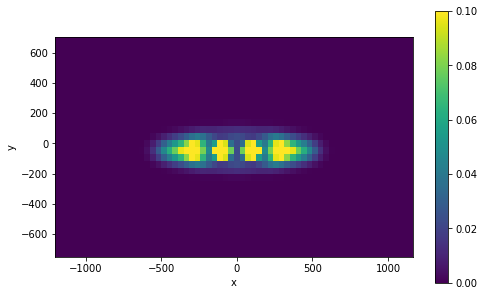

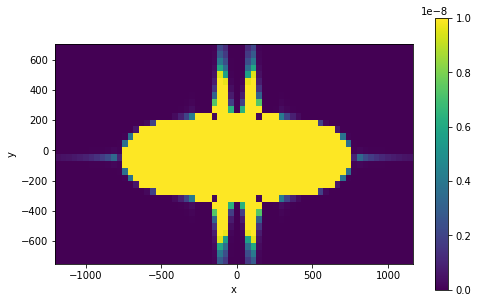

In [6]:
plt.figure(figsize=(8, 5))
# plot 2D density vs xy plane   
plt.imshow(np.transpose(den[:,:,x.shape[2]//2]), extent=[x.min(), x.max(), y.min(), y.max()])
# set lim on the color plot from 0 to 0.1
plt.clim(0, 0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.figure(figsize=(8, 5))
# plot 2D density vs xy plane   
plt.imshow(np.transpose(den[:,:,x.shape[2]//2]), extent=[x.min(), x.max(), y.min(), y.max()])
# set lim on the color plot from 0 to 0.1
plt.clim(0, 1.E-08)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

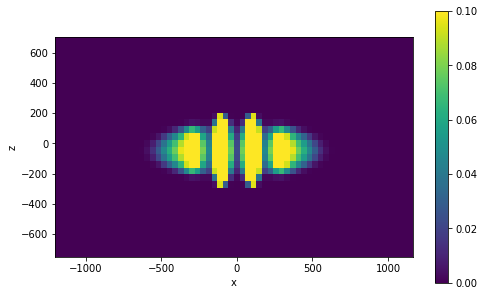

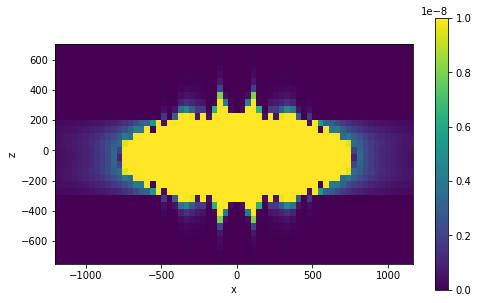

In [7]:
plt.figure(figsize=(8, 5))
# plot 2D density vs xz plane   
plt.imshow(np.transpose(den[:,y.shape[1]//2,:]), extent=[x.min(), x.max(), z.min(), z.max()])
# set lim on the color plot from 0 to 0.1
plt.clim(0, 0.1)
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()

plt.figure(figsize=(8, 5))
# plot 2D density vs xz plane   
plt.imshow(np.transpose(den[:,y.shape[1]//2,:]), extent=[x.min(), x.max(), z.min(), z.max()])
# set lim on the color plot from 0 to 0.1
plt.clim(0, 1.E-08)
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()

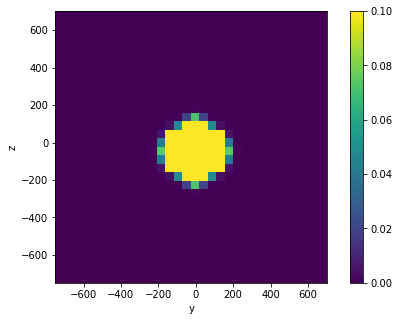

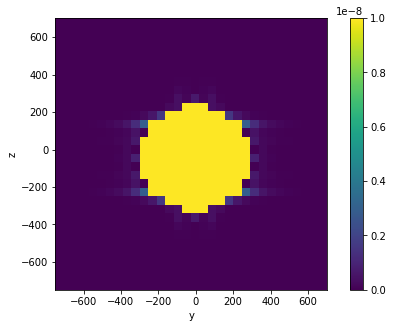

In [8]:
# den_yz = np.average(den, axis=(0))
den_yz = np.transpose(den[x.shape[0]//2,:,:])
den_yz = den_yz / np.max(den_yz)

plt.figure(figsize=(8, 5))
# plot 2D density vs yz plane   
# plt.imshow(den[x.shape[0]//2,:,:], extent=[y.min(), y.max(), z.min(), z.max()]) 
plt.imshow(den_yz, extent=[y.min(), y.max(), z.min(), z.max()]) 
# set lim on the color plot from 0 to 0.1
plt.clim(0, 0.1)
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

plt.figure(figsize=(8, 5))
# plot 2D density vs yz plane   
# plt.imshow(den[x.shape[0]//2,:,:], extent=[y.min(), y.max(), z.min(), z.max()]) 
plt.imshow(den_yz, extent=[y.min(), y.max(), z.min(), z.max()]) 
# set lim on the color plot from 0 to 0.1
plt.clim(0, 1.E-08)
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

In [9]:
fx = 18.5  # Hz
fy = 53
fz = 81	 # Hz
fun_unit = 7.89889045E-06 
w_ho = np.array([fx, fy, fz])
r_0 = 130 * 3 # 387.672168 
mu_m = 1.E-06 / (r_0 * 0.529E-10)
a_ho = fun_unit / np.sqrt(w_ho) / 1.E-06 * mu_m


L = np.array([800, 500, 500]) * 2 * 1.5
L / (1.5 * np.array([0.7*a_ho[0], 0.5*a_ho[1], 0.7*a_ho[2]]) * 50)


array([0.51356095, 0.76059263, 0.67162778])

In [10]:


# # Define the parameters
# nparticles = 35_000
# fx, fy, fz = 18.5, 53, 81
# # Harmonic oscillator length is given by a_ho = sqrt(hbar/(m*omega)), where m is the mass of the atom, and omega is the 2*pi*f0, where f0 is the frequency of the trap.
# # We want to calculate a_h0 / r_0 = sqrt(hbar/(m*omega)/r_0, where r_0 = 390 a_0.
# # a_h0/r_0 = sqrt(1.05457182e-34 m^2 kg / s / ( 162 * (1.66053907e-27 kilograms) * (2*pi*20 Hertz)) / (390 * 5.291772109E-11 m)= 1.7662456 microns / ((390 * 5.291772109E-11 m)) = 85.5825757
# # a_h0_y = a_h0 * sqrt(18.5/53) = = 85.5825757 * sqrt(18.5/53) = 50.563052245
# # a_h0_z = a_h0 * sqrt(18.5/81) = = 85.5825757 * sqrt(18.5/81) = 40.9005085201



# # Get the optimal sr and sz
# gp = eGPE(eps_dd=1.38,
#           nparticles=nparticles,
#           fx=fx, fy=fy, fz=fz,
#           nxyz=np.array([512, 64, 32]),
#           box_size=np.array([800, 500, 500]) * 2 * 1.5,
#           # rho_cutoff=0.8,
#           # z_cutoff=0.8,
#           )

# r0 = gp.box_size / 20
# gp.psi  = np.exp(-0.5 * (gp.x / r0[0]-1)**2 - 0.5 * (gp.y / r0[1])**2 - 0.5 * (gp.z / r0[2])**2) + 0j
# gp.psi += np.exp(-0.5 * (gp.x / r0[0]+1)**2 - 0.5 * (gp.y / r0[1])**2 - 0.5 * (gp.z / r0[2])**2) + 0j
# gp.normalize_psi()


# gp.evolve(10, 1E+03)

[INFO] Initializing random psi


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]
